In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [3]:
train = pd.read_csv(r"C:\Users\Shrawani\Downloads\archive\train.csv")
test = pd.read_csv(r"C:\Users\Shrawani\Downloads\archive\test.csv")


1. **age**: Age of the individual.
2. **job**: Occupation or job type of the individual.
3. **marital**: Marital status of the individual (e.g., married, single, divorced).
4. **education**: Level of education of the individual (e.g., primary, secondary, tertiary).
5. **default**: Whether the individual has credit in default (yes or no).
6. **balance**: Account balance of the individual.
7. **housing**: Whether the individual has a housing loan (yes or no).
8. **loan**: Whether the individual has a personal loan (yes or no).
9. **contact**: Type of communication contact with the individual (e.g., cellular, telephone).
10. **day**: Day of the month when the contact was made.
11. **month**: Month of the year when the contact was made.
12. **duration**: Duration of the last contact in seconds.
13. **campaign**: Number of contacts performed during this campaign for this individual.
14. **pdays**: Number of days that passed by after the client was last contacted from a previous campaign (-1 means the client was not previously contacted).
15. **previous**: Number of contacts performed before this campaign for this individual.
16. **poutcome**: Outcome of the previous marketing campaign (e.g., success, failure, other, unknown).
17. **y**: Whether the individual subscribed to a term deposit (yes ois.

This data seems to be related to a marketing campaign for term deposits, where the goal is to predict whether a customer will subscribe to a term deposit based on various features provided.

In [4]:
display(train.head(), train.shape)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


(31647, 18)

In [5]:
display(test.head(), test.shape)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


(13564, 17)

In [6]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
# checking for duplicates and removing them
print(train.shape)
data = train.drop_duplicates()
print(train.shape)

(31647, 18)
(31647, 18)


This shows that there are no duplicates in our data.

In [9]:
for i in train.columns.tolist():
    print('----'*15)
    print("---"*15)
    print(i)
    print("---"*5)
    print(train[i].value_counts())

------------------------------------------------------------
---------------------------------------------
ID
---------------
ID
26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: count, Length: 31647, dtype: int64
------------------------------------------------------------
---------------------------------------------
age
---------------
age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64
------------------------------------------------------------
---------------------------------------------
job
---------------
job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int6

In [10]:
train['job'] = train['job'].str.replace('.', '')
test['job'] = test['job'].str.replace('.', '')

In [11]:
train.job.unique()

array(['admin', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,31647.0,22563.972162,13075.936990,2.0,11218.0,22519.0,33879.5,45211.0
age,31647.0,40.957247,10.625134,18.0,33.0,39.0,48.0,95.0
balance,31647.0,1363.890258,3028.304293,-8019.0,73.0,450.0,1431.0,102127.0
day,31647.0,15.835466,8.337097,1.0,8.0,16.0,21.0,31.0
duration,31647.0,258.113534,257.118973,0.0,104.0,180.0,318.5,4918.0
campaign,31647.0,2.765697,3.113830,1.0,1.0,2.0,3.0,63.0
pdays,31647.0,39.576042,99.317592,-1.0,-1.0,-1.0,-1.0,871.0
previous,31647.0,0.574272,2.422529,0.0,0.0,0.0,0.0,275.0


In [13]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,13564.0,22704.057726,12994.043329,1.0,11546.0,22782.0,33974.25,45206.0
age,13564.0,40.887128,10.604108,18.0,33.0,39.0,48.00,95.0
balance,13564.0,1358.496535,3082.940623,-3313.0,71.0,445.0,1413.25,98417.0
day,13564.0,15.738646,8.288174,1.0,8.0,16.0,21.00,31.0
duration,13564.0,258.278679,258.488648,0.0,102.0,180.0,319.00,3253.0
campaign,13564.0,2.759510,3.060928,1.0,1.0,2.0,3.00,58.0
pdays,13564.0,41.648555,101.985178,-1.0,-1.0,-1.0,-1.00,850.0
previous,13564.0,0.594441,1.998193,0.0,0.0,0.0,0.00,55.0


In [14]:
display(train.columns,test.columns)

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

c:\Users\Shrawani\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


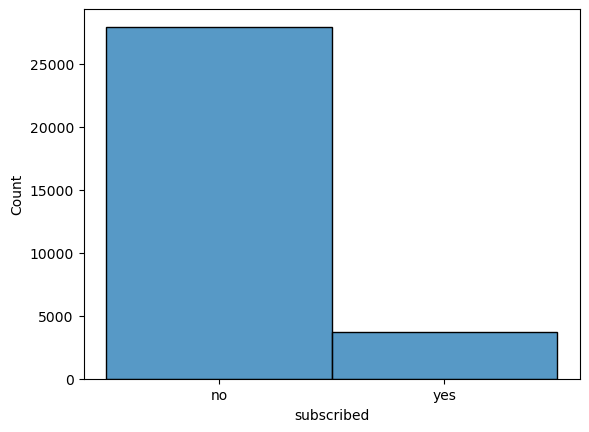

In [15]:
# distribution of subscribers 
sns.histplot(train['subscribed'])
plt.show()

- The above graph shows the distribution of subscribers and non-subscribers, there is an imbalance in the data.
- There are 27932 non-subscribers and 3715 subscribers.
- This indicates that customers were not interested to subscribe for the term deposit.

### What is the distribution of term deposit subscriptions among different demographic groups (age, job, marital status, education level)?

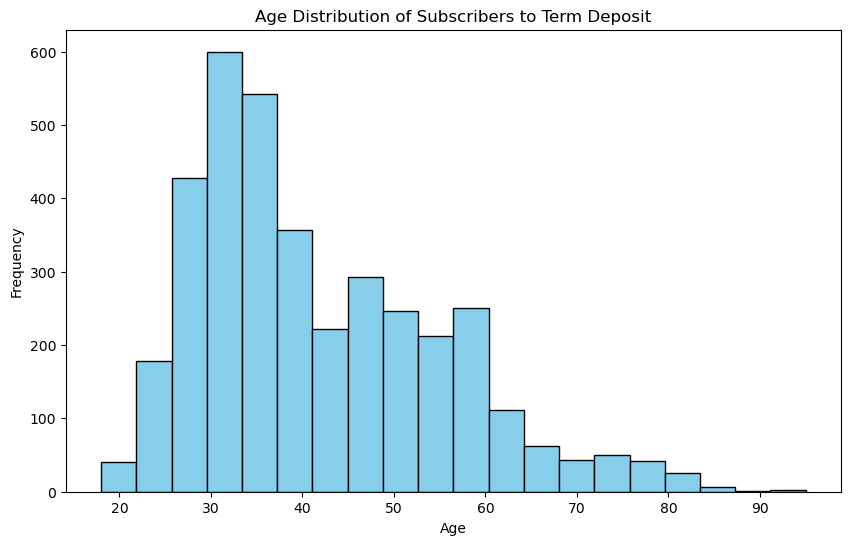

In [16]:
#distribution of age who have subscribed for the term deposit
# Filter the data for individuals who have subscribed to the term deposit
subscribed_data = train[train['subscribed'] == 'yes']

# Plotting the age distribution
plt.figure(figsize=(10, 6))
subscribed_data['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Subscribers to Term Deposit')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

- The above graph is right skewed which means it is positively skewed.
- We can see that customers aged 29 to 60 have subscribed for the term deposit.

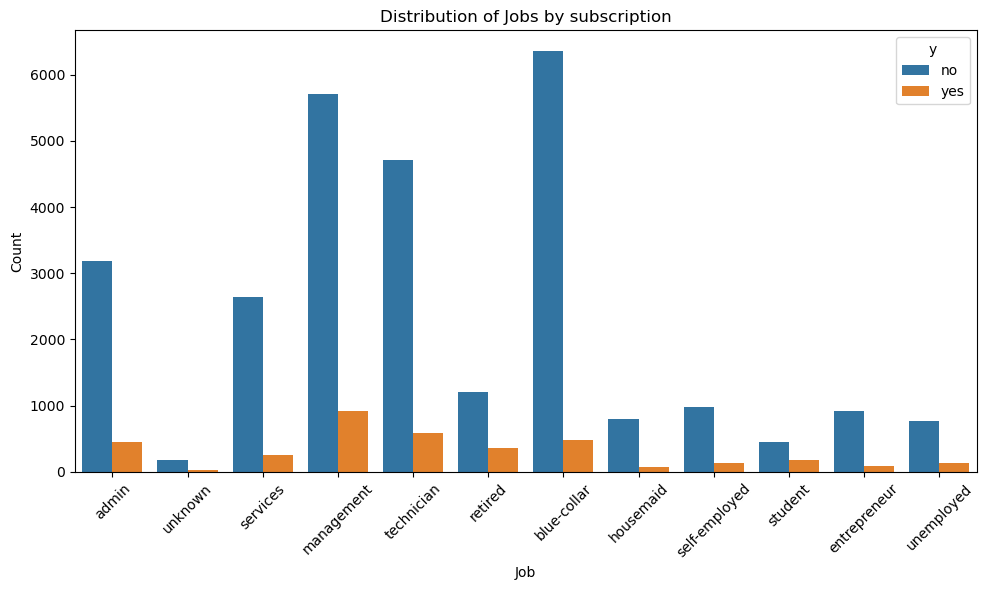

In [17]:
# Plotting the job distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="job", hue="subscribed", data=train)
plt.title("Distribution of Jobs by subscription")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="y")
plt.tight_layout()
plt.show()

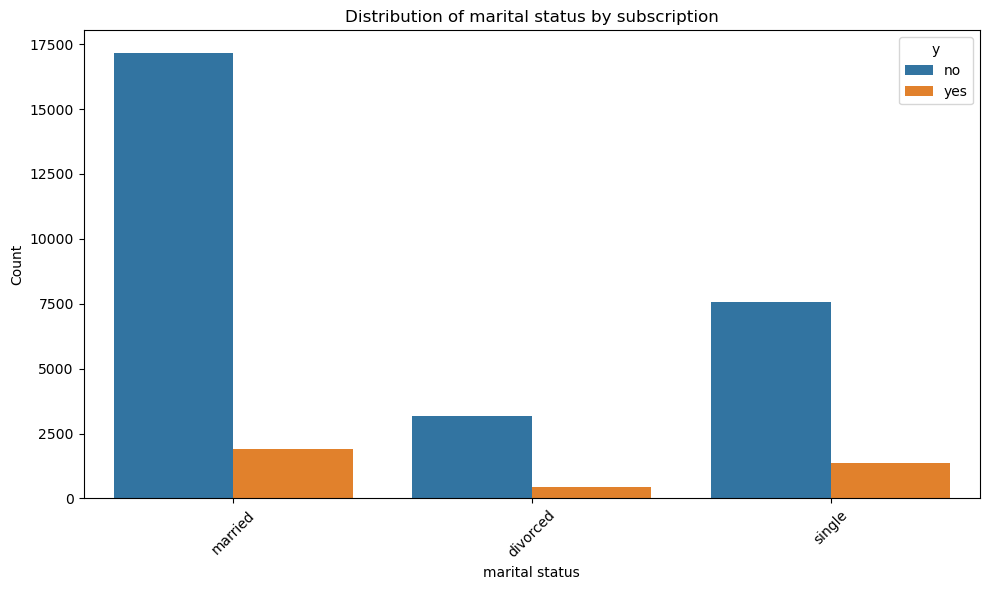

In [18]:
# Plotting the marital status distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="marital", hue="subscribed", data=train)
plt.title("Distribution of marital status by subscription")
plt.xlabel("marital status")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="y")
plt.tight_layout()
plt.show()

c:\Users\Shrawani\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='balance', ylabel='Count'>

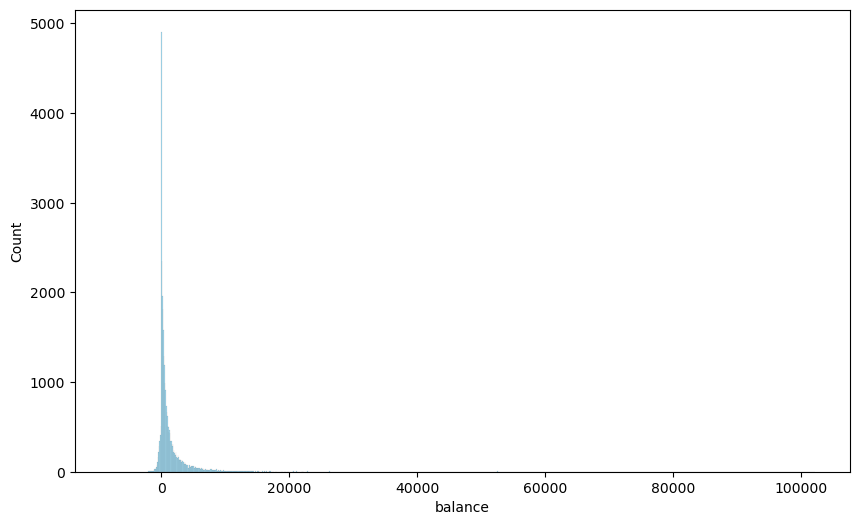

In [19]:
# distribution of account balance
plt.figure(figsize=(10, 6))
sns.histplot(x=train['balance'], data=train,color='skyblue', edgecolor='black')

- There is a prominent spike in the count at the lower end of the balance scale, indicating that a large number of accounts have low balances.
- As balance increases, count decreases sharply; very few accounts have high balances.
- This can also be the reason for less subscribers.

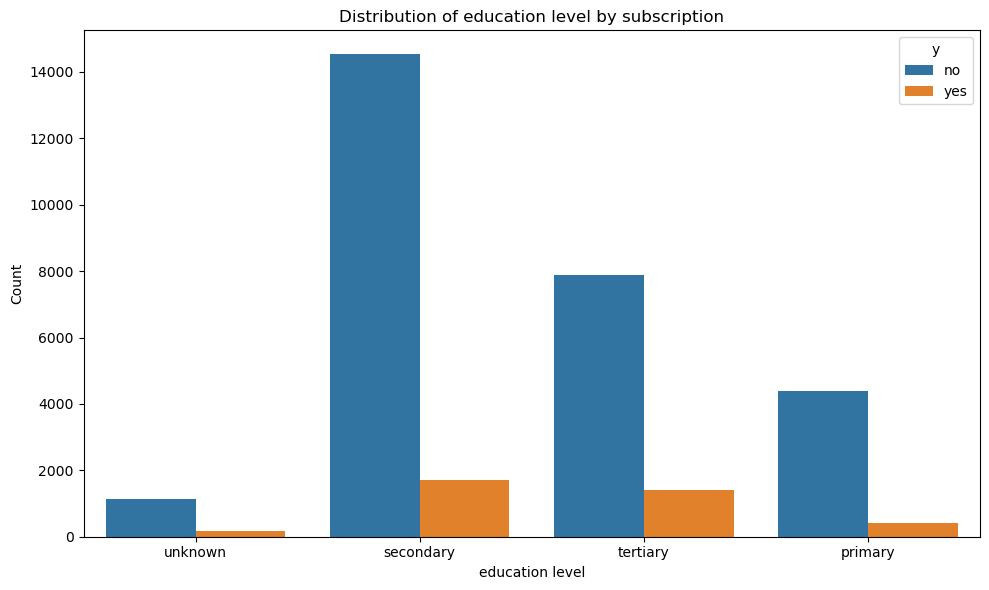

In [20]:
# distribution of education level
plt.figure(figsize=(10, 6))
sns.countplot(x=train['education'], hue=train['subscribed'], data=train)
plt.title("Distribution of education level by subscription")
plt.xlabel("education level")
plt.ylabel("Count")
plt.legend(title="y")
plt.tight_layout()
plt.show()

- The above plot shows that customers with 'secondary' and 'tertiary' level have subscribed for the term depoit.

#### If we plot the same using a box plot 

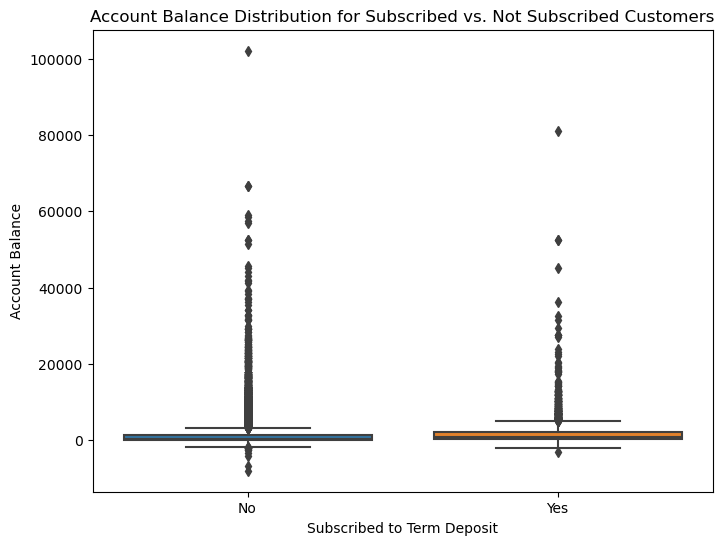

In [21]:
# Plotting boxplot to compare account balance for subscribed vs. not subscribed customers
plt.figure(figsize=(8, 6))
sns.boxplot(x='subscribed', y='balance', data=train)
plt.title('Account Balance Distribution for Subscribed vs. Not Subscribed Customers')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Account Balance')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

- There are fewer outlieres in both the categories.
- There are several outliers with high account balances (up to 70,000) who are non subscribers and subscribers (up to 20000-30000).

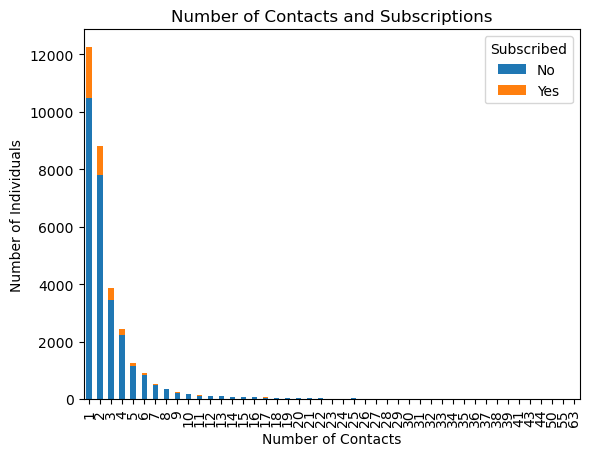

In [22]:
# Group data by 'campaign' and 'y', then count occurrences
grouped_data = data.groupby(['campaign', 'subscribed']).size().unstack(fill_value=0)

# Plotting
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Number of Contacts')
plt.ylabel('Number of Individuals')
plt.title('Number of Contacts and Subscriptions')
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

- In the above graph we can see the number of contacts made with the customers, in the initial stage, the number of contacts made once were answered, but most of them did not subscribe and few opted to subscribe.
- As the number of contacts increased, the overall number of individuals decreased this might be due to irritation and not being interested.
- For marketing or outreach campaigns, it’s essential to balance reaching out to potential subscribers and avoiding excessive contact..

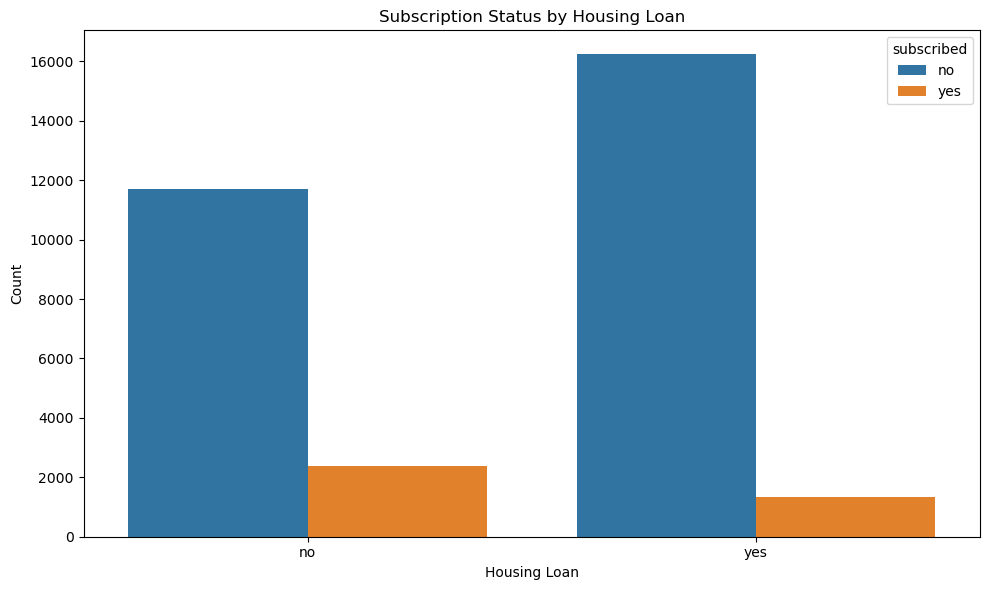

In [23]:
# Creating a plot to show the count of people who have subscribed or not, based on their housing loan status.
plt.figure(figsize=(10, 6))
sns.countplot(x='housing', hue='subscribed', data=train)  
plt.title('Subscription Status by Housing Loan') 
plt.xlabel('Housing Loan') 
plt.ylabel('Count') 
plt.tight_layout() 
plt.show()

- In the above graph we can see that, 2000 above customers have not subscribed for deposit since they have a house loan.
- There are few who are interseted.

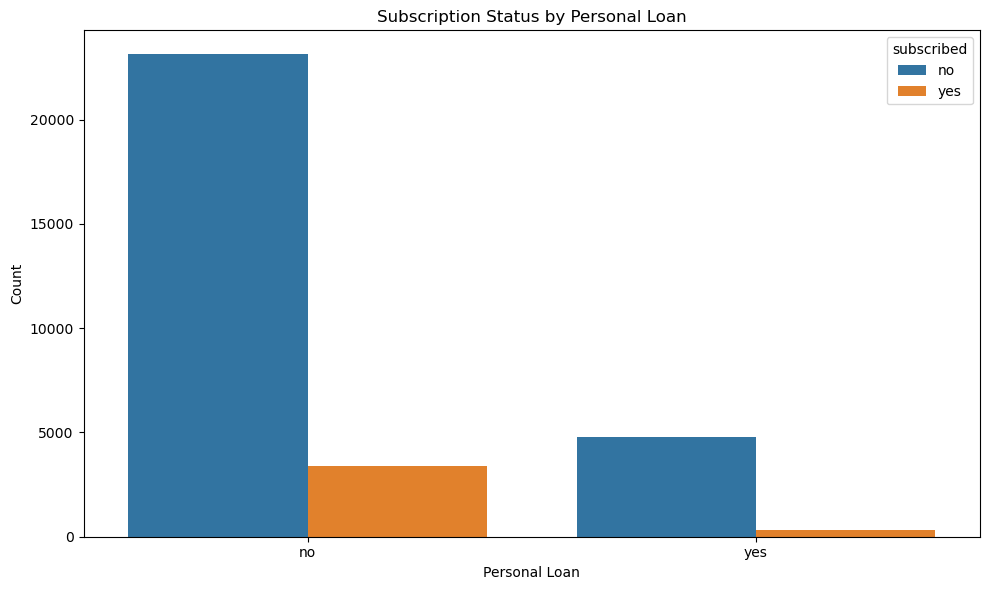

In [24]:
# Creating a plot to show the count of people who have subscribed or not, based on their personal loan status.
plt.figure(figsize=(10, 6))
sns.countplot(x='loan', hue='subscribed', data=train)  
plt.title('Subscription Status by Personal Loan') 
plt.xlabel('Personal Loan') 
plt.ylabel('Count') 
plt.tight_layout() 
plt.show()

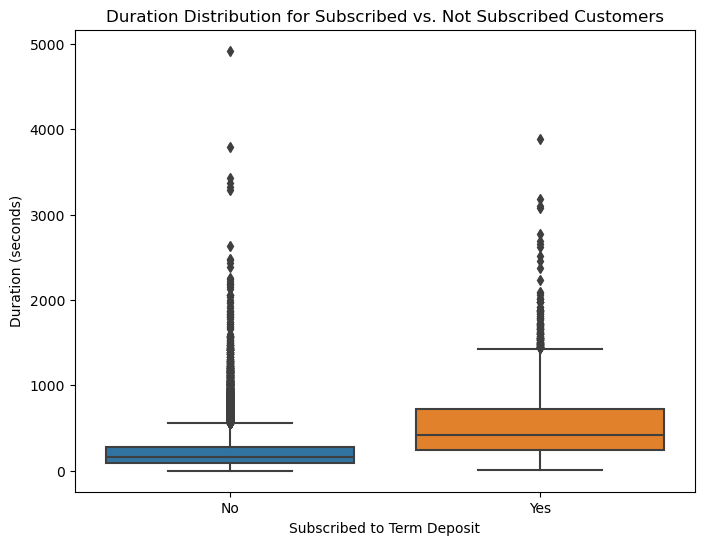

In [25]:
# Plotting boxplot to compare contact duration for subscribed vs. not subscribed customers
plt.figure(figsize=(8, 6))
sns.boxplot(x='subscribed', y='duration', data=train)
plt.title('Duration Distribution for Subscribed vs. Not Subscribed Customers')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Duration (seconds)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

- By comparing the boxplots, we can see that the “Yes” group has a higher median duration and a wider spread (larger IQR) compared to the “No” group.
- This suggests that customers who subscribed to the term deposit tend to have longer contact durations.

In [26]:
campaign_summary = train.groupby('month')['campaign'].sum()
highest_campaign_month = campaign_summary.sort_values(ascending=False)
print(highest_campaign_month)

month
may    23727
jul    17193
aug    16794
jun    11876
nov     5345
feb     4307
apr     4025
jan     1649
oct      783
mar      751
sep      710
dec      366
Name: campaign, dtype: int64


In [27]:
# List of categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# One Hot Encoding
df_train = pd.get_dummies(train, columns=categorical_vars, drop_first=True)

# Encode target variable (assuming 'y' is the target)
df_train['subscribed'] = df_train['subscribed'].map({'yes': 1, 'no': 0})

# Convert all boolean columns to binary (0 and 1)
df_train = df_train.astype(int)

In [28]:
# List of categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# One Hot Encoding
df_test = pd.get_dummies(test, columns=categorical_vars, drop_first=True)

In [29]:
df_train.dtypes

ID                     int32
age                    int32
balance                int32
day                    int32
duration               int32
campaign               int32
pdays                  int32
previous               int32
subscribed             int32
job_blue-collar        int32
job_entrepreneur       int32
job_housemaid          int32
job_management         int32
job_retired            int32
job_self-employed      int32
job_services           int32
job_student            int32
job_technician         int32
job_unemployed         int32
job_unknown            int32
marital_married        int32
marital_single         int32
education_secondary    int32
education_tertiary     int32
education_unknown      int32
default_yes            int32
housing_yes            int32
loan_yes               int32
contact_telephone      int32
contact_unknown        int32
month_aug              int32
month_dec              int32
month_feb              int32
month_jan              int32
month_jul     

#### Feature Selection

In [30]:
# Initialize dictionaries to hold correlation values and p-values
correlation_dict = {}
pvalue_dict = {}

# Calculate Pearson correlation and p-value for each feature with the target variable
for column in df_train.columns:
    if column != 'subscribed':
        corr, pvalue = pearsonr(df_train[column], df_train['subscribed'])
        correlation_dict[column] = corr
        pvalue_dict[column] = pvalue

# Convert the dictionaries to pandas DataFrames for better readability
correlation_df = pd.DataFrame.from_dict(correlation_dict, orient='index', columns=['Pearson Correlation'])
pvalue_df = pd.DataFrame.from_dict(pvalue_dict, orient='index', columns=['P-Value'])

# Merge the correlation and p-value dataframes
results_df = correlation_df.merge(pvalue_df, left_index=True, right_index=True)

# Sort by Pearson Correlation
results_df.sort_values(by='Pearson Correlation', ascending=False, inplace=True)

# Display the results
print(results_df)

                     Pearson Correlation        P-Value
duration                        0.389838   0.000000e+00
poutcome_success                0.309125   0.000000e+00
ID                              0.296663   0.000000e+00
month_oct                       0.127530  7.352530e-115
month_mar                       0.127090  4.483237e-114
month_sep                       0.124028  1.073277e-108
pdays                           0.108290   3.621753e-83
previous                        0.088081   1.532171e-55
job_retired                     0.080029   3.928775e-46
job_student                     0.075230   5.921671e-41
month_dec                       0.074849   1.476722e-40
education_tertiary              0.069641   2.503381e-35
marital_single                  0.066253   3.968605e-32
balance                         0.050807   1.512795e-19
month_feb                       0.038104   1.194918e-11
job_management                  0.034637   7.122774e-10
poutcome_other                  0.032693   5.984

In [31]:
# Filter for statistically significant features (p-value < 0.05)
significant_features_df = results_df[results_df['P-Value'] < 0.05]

# Display statistically significant features
print(significant_features_df)

                     Pearson Correlation        P-Value
duration                        0.389838   0.000000e+00
poutcome_success                0.309125   0.000000e+00
ID                              0.296663   0.000000e+00
month_oct                       0.127530  7.352530e-115
month_mar                       0.127090  4.483237e-114
month_sep                       0.124028  1.073277e-108
pdays                           0.108290   3.621753e-83
previous                        0.088081   1.532171e-55
job_retired                     0.080029   3.928775e-46
job_student                     0.075230   5.921671e-41
month_dec                       0.074849   1.476722e-40
education_tertiary              0.069641   2.503381e-35
marital_single                  0.066253   3.968605e-32
balance                         0.050807   1.512795e-19
month_feb                       0.038104   1.194918e-11
job_management                  0.034637   7.122774e-10
poutcome_other                  0.032693   5.984

In [32]:
# List of selected features
selected_features = [
    'duration', 'poutcome_success', 'month_oct', 'month_mar', 'month_sep', 'pdays', 
    'previous', 'job_retired', 'job_student', 'month_dec', 'education_tertiary', 
    'marital_single', 'balance', 'month_feb', 'job_management', 'poutcome_other', 
    'age', 'job_unemployed', 'contact_telephone', 'job_housemaid', 'month_jun', 
    'month_nov', 'job_entrepreneur', 'default_yes', 'job_services', 'day', 'month_jul', 
    'education_secondary', 'marital_married', 'campaign', 'loan_yes', 'job_blue-collar', 
    'month_may', 'housing_yes', 'contact_unknown', 'poutcome_unknown'
]

# Ensure these columns exist in your dataset
df = df_train[selected_features + ['subscribed']]              

In [35]:
df.to_csv('df.csv',index='False')

In [39]:
df_test = df_test.astype(int)

In [40]:
# List of selected features
selected_features = [
    'duration', 'poutcome_success', 'month_oct', 'month_mar', 'month_sep', 'pdays', 
    'previous', 'job_retired', 'job_student', 'month_dec', 'education_tertiary', 
    'marital_single', 'balance', 'month_feb', 'job_management', 'poutcome_other', 
    'age', 'job_unemployed', 'contact_telephone', 'job_housemaid', 'month_jun', 
    'month_nov', 'job_entrepreneur', 'default_yes', 'job_services', 'day', 'month_jul', 
    'education_secondary', 'marital_married', 'campaign', 'loan_yes', 'job_blue-collar', 
    'month_may', 'housing_yes', 'contact_unknown', 'poutcome_unknown'
]

# Ensure these columns exist in your dataset
df1 = df_test[selected_features]    

In [42]:
df1.to_csv('df1.csv',index='False')